In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
train_df = pd.read_csv("/kaggle/input/snakeclef2022/SnakeCLEF2022-TrainMetadata.csv")
train_df['file_path']="/kaggle/input/snakeclef2022/SnakeCLEF2022-medium_size/SnakeCLEF2022-medium_size/"+train_df['file_path']

In [17]:
train_df.head()

,observation_id,endemic,binomial_name,country,code,class_id,file_path
0,2670823,True,Zamenis lineatus,Sicily,IT,1567,/kaggle/input/snakeclef2022/SnakeCLEF2022-medi...
1,96294178,False,Liasis olivaceus,Queensland,AU,816,/kaggle/input/snakeclef2022/SnakeCLEF2022-medi...
2,70108926,False,Xenoxybelis argenteus,Amazonas,VE,1561,/kaggle/input/snakeclef2022/SnakeCLEF2022-medi...
3,70108926,False,Xenoxybelis argenteus,Amazonas,VE,1561,/kaggle/input/snakeclef2022/SnakeCLEF2022-medi...
4,117935,False,Aspidelaps lubricus,Northern Cape,ZA,81,/kaggle/input/snakeclef2022/SnakeCLEF2022-medi...


In [18]:
train_df.shape

(270251, 7)

#### There are more than 2,70,000 images of different Snake species in the whole dataset.

In [19]:
train_df["code"].nunique()

207

#### THERE ARE 207 DIFFERENT COUNTRIES. WE ARE FOCUSING ONLY ON THE INIDAN SUB CONTINENT. SO WE WILL MODIFY THE DATA ACCORDINGLY.

In [20]:
np.set_printoptions(threshold=np.inf)
arr = train_df["code"].unique()
print(arr)

['IT' 'AU' 'VE' 'ZA' 'unknown' 'FR' 'US' 'ID' 'RU' 'TH' 'BR' 'NL' 'IN'
 'CM' 'HR' 'AM' 'TZ' 'ZW' 'ET' 'ES' 'CR' 'BI' 'GY' 'YE' 'HN' 'MA' 'EC'
 'CZ' 'MX' 'JO' 'HK' 'MG' 'PY' 'PT' 'SN' 'PE' 'DM' 'PA' 'SZ' 'CA' 'GR'
 'NI' 'BZ' 'BG' 'GB' 'TT' 'BO' 'SG' 'GF' 'LB' 'BW' 'AR' 'TW' 'MY' 'CL'
 'CO' 'GT' 'AT' 'NC' 'KG' 'KE' 'SV' 'KY' 'SK' 'JP' 'UA' 'KR' 'OM' 'UY'
 'CN' 'KZ' 'RS' 'ZM' 'CF' 'TL' 'CU' 'DE' 'PG' 'FI' 'LK' 'KH' 'SE' 'IQ'
 'RO' 'NP' 'HU' 'BF' 'PL' 'DZ' 'SB' 'LA' 'EE' 'DO' 'ME' 'LY' 'VN' 'GI'
 'NG' 'SR' 'DK' 'GH' 'GE' 'TR' 'AZ' 'QA' 'MN' 'CH' 'BQ' 'TD' 'EG' 'PH'
 'UG' 'GA' 'NE' 'TN' 'AE' 'BS' 'SY' 'PR' 'IR' 'BE' 'VU' 'EH' 'MR' 'PK'
 'WS' 'SC' 'MZ' 'RE' 'AO' 'BJ' 'LT' 'MD' 'BT' 'NO' 'SI' 'CG' 'GQ' 'AW'
 'GM' 'WF' 'CY' 'IM' 'HT' 'AL' 'VG' 'IL' 'GN' 'BN' 'UZ' 'GW' 'LR' 'CD'
 'TJ' 'BY' 'MW' 'FJ' 'BL' 'ST' 'CI' 'AF' 'TG' 'RW' 'TO' 'JM' 'SA' 'GU'
 'BA' 'MK' 'MU' 'SL' 'AX' 'PW' 'PS' 'VA' 'SS' 'GP' 'BD' 'LV' 'MO' 'MV'
 'NZ' 'MM' 'ML' 'VI' 'LU' 'SD' 'CX' 'MT' 'LS' 'KW' 'XK' 'AG' 'KP' 'TM'
 'AD' 

In [21]:
train_data = train_df[(train_df["code"]=="IN") | (train_df["code"]=="BD") | (train_df["code"]=="BT") |
                      (train_df["code"]=="MV") | (train_df["code"]=="NP") | (train_df["code"]=="PK") |
                      (train_df["code"]=="LK")]

In [22]:
train_data["binomial_name"].nunique()

151

#### There are 151 diffrent species of snaked in Indian subcontinet. But we are concerned about the four deadly venomous Snakes that includes NAJA NAJA, BUNGARUS CAERULES, DABOIA RUSSELII, ECHIS CARINATUS.

In [23]:
snake_df = train_data[(train_data["binomial_name"]=="Naja naja") | (train_data["binomial_name"]=="Bungarus caeruleus") |
                      (train_data["binomial_name"]=="Daboia russelii") | (train_data["binomial_name"]=="Echis carinatus") ]

In [24]:
snake_df.head()

,observation_id,endemic,binomial_name,country,code,class_id,file_path
1294,54747641,False,Daboia russelii,Maharashtra,IN,415,/kaggle/input/snakeclef2022/SnakeCLEF2022-medi...
1326,77219002,False,Echis carinatus,Gujarat,IN,521,/kaggle/input/snakeclef2022/SnakeCLEF2022-medi...
1327,77219002,False,Echis carinatus,Gujarat,IN,521,/kaggle/input/snakeclef2022/SnakeCLEF2022-medi...
1328,77219002,False,Echis carinatus,Gujarat,IN,521,/kaggle/input/snakeclef2022/SnakeCLEF2022-medi...
1391,54717670,False,Daboia russelii,Maharashtra,IN,415,/kaggle/input/snakeclef2022/SnakeCLEF2022-medi...


In [25]:
snake_df.shape

(1305, 7)

#### Now there are total 1305 images of snakes belonging to four species.

In [26]:
snake_df.info

<bound method DataFrame.info of         observation_id  endemic    binomial_name      country code  class_id  \
1294          54747641    False  Daboia russelii  Maharashtra   IN       415   
1326          77219002    False  Echis carinatus      Gujarat   IN       521   
1327          77219002    False  Echis carinatus      Gujarat   IN       521   
1328          77219002    False  Echis carinatus      Gujarat   IN       521   
1391          54717670    False  Daboia russelii  Maharashtra   IN       415   
...                ...      ...              ...          ...  ...       ...   
269715       106365727    False  Daboia russelii   Tamil Nadu   IN       415   
269716       106365727    False  Daboia russelii   Tamil Nadu   IN       415   
269717       106365727    False  Daboia russelii   Tamil Nadu   IN       415   
269718       106365727    False  Daboia russelii   Tamil Nadu   IN       415   
269719       106365727    False  Daboia russelii   Tamil Nadu   IN       415   

       

### SAMPLE IMAGE

Daboia russelii


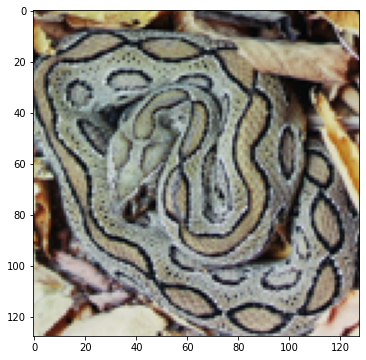

In [44]:
from PIL import Image
image = Image.open(snake_df.iloc[11]["file_path"])
image = image.resize((128,128))
plt.figure(figsize=(6,6))
plt.imshow(image)
print(snake_df.iloc[11]["binomial_name"])

# EDA

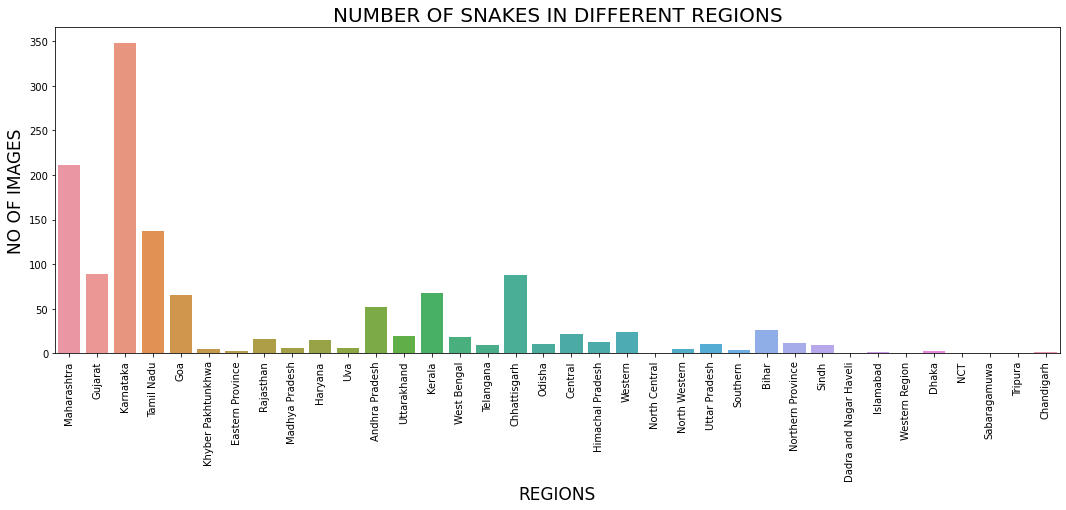

In [32]:
plt.figure(figsize=(18,6))
sns.countplot(x="country",data=snake_df)
plt.xticks(rotation=90)
plt.title("NUMBER OF SNAKES IN DIFFERENT REGIONS",size=20)
plt.xlabel("REGIONS",size=17)
plt.ylabel("NO OF IMAGES",size=17)
plt.show()

#### MOST OF THE SNAKES ARE FROM KARNATAK & MAHARASHTRA REGIONS.

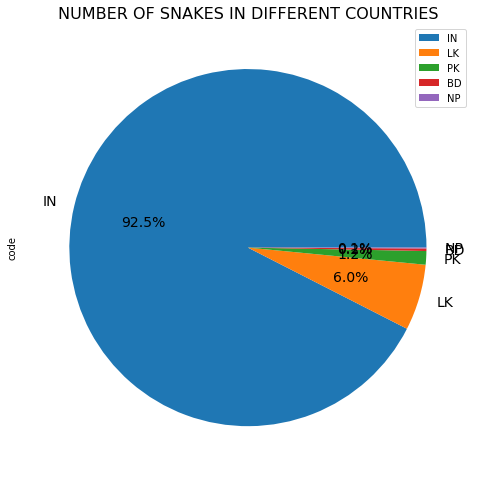

In [35]:
plt.figure(figsize=(8,12))
code_counts = snake_df["code"].value_counts()
code_counts.plot(kind="pie",autopct='%1.1f%%',fontsize=14)
plt.title("NUMBER OF SNAKES IN DIFFERENT COUNTRIES",size=16)
plt.legend(fontsize=10)
plt.show()

#### MAXIMUM IMAGES OF SNAKES WERE TAKEN FROM INDIA.

In [41]:
top_type_snakes = snake_df.groupby("binomial_name").binomial_name.count()

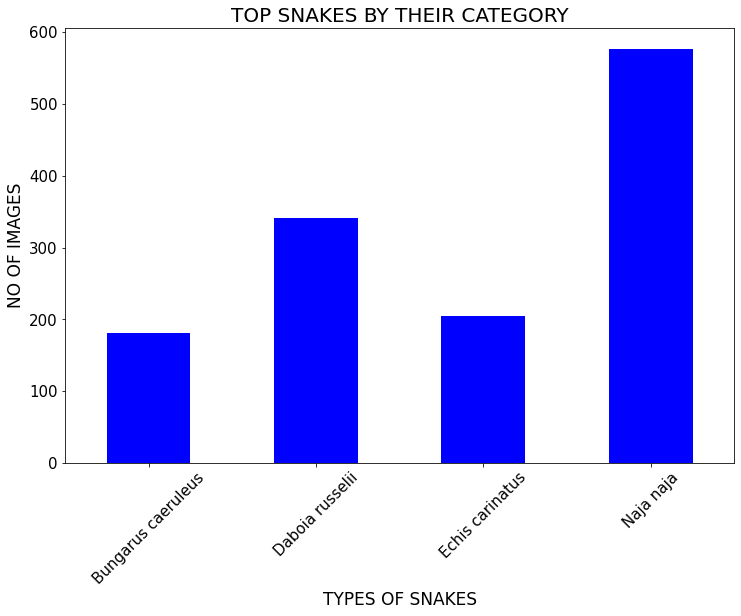

In [42]:
plt.figure(figsize=(12,8))
top_type_snakes.plot(kind="bar",fontsize = 15,color="blue")
plt.title("TOP SNAKES BY THEIR CATEGORY",size=20)
plt.xticks(rotation=45)
plt.xlabel("TYPES OF SNAKES",size=17)
plt.ylabel("NO OF IMAGES",size=17)
plt.show()

#### NAJA NAJA SPECIES HAS THE MOST NO OF IMAGES IN OUR DATA.